In [1]:
pip install keras_preprocessing

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels
            

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Legion\AppData\Roaming\Python\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.3 MB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 533.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 1.9 MB/s eta 0:00:05
    --------------------------------------- 0.1/9.2 MB 1.4 MB/s eta 0:00:07
    --------------------------------------- 0.1/9.2 MB 1.4 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.2 MB 980.4 kB/s eta 0:00:10
    --------------------------------------- 0.2/9.2 MB 980.4 kB/s eta 0:00:10
   - -----------------

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [19]:
model = Sequential()
# convolution layers
model.add(Conv2D(128 , kernel_size = (3,3), activation = 'relu' , input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256 , kernel_size = (3,3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512 , kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512 , kernel_size = (3,3), activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
#fully connected layers
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))

# Output layer

model.add(Dense(7, activation = 'softmax'))


In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [21]:
model.fit(x = x_train, y = y_train, batch_size = 128 , epochs = 50 , validation_data = (x_test, y_test))

Epoch 1/100


226/226 [==============================] - 157s 687ms/step - loss: 1.8227 - accuracy: 0.2465 - val_loss: 1.8002 - val_accuracy: 0.2621
Epoch 2/100
226/226 [==============================] - 148s 657ms/step - loss: 1.7434 - accuracy: 0.2798 - val_loss: 1.6517 - val_accuracy: 0.3631
Epoch 3/100
226/226 [==============================] - 150s 663ms/step - loss: 1.6056 - accuracy: 0.3616 - val_loss: 1.4502 - val_accuracy: 0.4540
Epoch 4/100
226/226 [==============================] - 153s 677ms/step - loss: 1.4825 - accuracy: 0.4232 - val_loss: 1.3588 - val_accuracy: 0.4808
Epoch 5/100
226/226 [==============================] - 146s 647ms/step - loss: 1.4131 - accuracy: 0.4568 - val_loss: 1.2962 - val_accuracy: 0.5013
Epoch 6/100
226/226 [==============================] - 146s 646ms/step - loss: 1.3676 - accuracy: 0.4747 - val_loss: 1.2340 - val_accuracy: 0.5253
Epoch 7/100
226/226 [==============================] - 145s 641ms/step - loss: 1.3322 - accuracy: 0.4917 - val_loss:

In [59]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [60]:
from keras.models import model_from_json

In [61]:
json_file = open("emotiondetector.json","r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [62]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [86]:
def ef(image):
    img = load_img(image,grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [90]:

image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(np.expand_dims(img, axis=0))
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
# plt.imshow(img.reshape(48,48), cmap = "gray")

original image is of angry
1/1 [==============================] - 0s 45ms/step
model prediction is  angry


In [89]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.8 kB ? eta -:--:--
     ------------------- ------------------- 81.9/160.8 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.2/7.6 MB 5.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.6 MB 3.2 MB/s eta 0:00:03
   - -------------------------------------- 0.4/7.6 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.6 MB 3.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.6 MB 3.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.6 MB 3.3 MB/s eta 0:00:03
   ---- ----------------

original image is of surprise
1/1 [==============================] - 0s 43ms/step
model prediction is  surprise


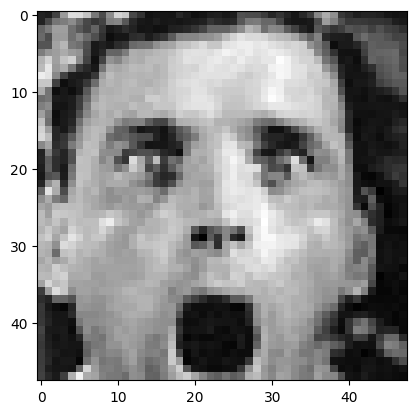

In [96]:
import matplotlib.pyplot as plt
image = 'images/train/surprise/29.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(np.expand_dims(img, axis=0))
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48), cmap = "gray")